# <font color='blue'> Linear Models - regression, logistic regression : Supervised learning
https://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; # sns.set()
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings(action='ignore')
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

## 단순 회귀 생성(Simple Linear Regression)

직선(선형변환식)으로 데이터를 학습(fit, learning)한다.
$$
y = ax + b
$$

$a$ 는 직선의 기울기*(slope)*, $b$는 직선의 절편(*intercept*).
기울기가 2이고 절편이 -5인 직선을 가정하면

In [2]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(100)    # shape (100,1)
y = 3 * x + rng.randn(100)*2

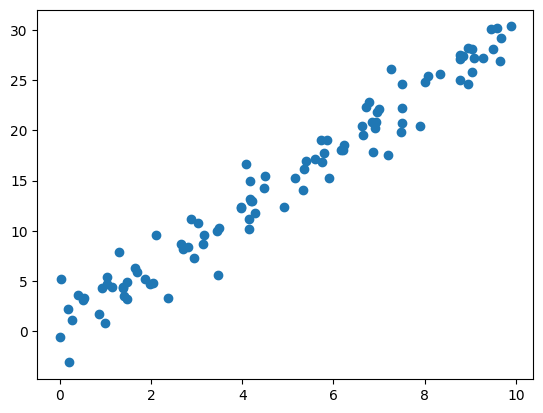

In [3]:
plt.scatter(x, y)

In [4]:
from sklearn import linear_model
model = linear_model.LinearRegression(fit_intercept=True)
model.fit(x[:, np.newaxis], y)
xfit = np.linspace(0, 10, 100)
yfit = model.predict(xfit[:, np.newaxis])

LinearRegression()

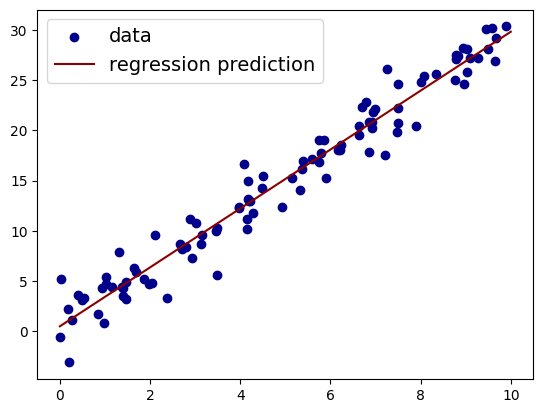

In [5]:
plt.scatter(x, y, color='darkblue', label='data')
plt.plot(xfit, yfit, color='darkred', label='regression prediction')
plt.legend(fontsize='14')

In [6]:
from sklearn.metrics import mean_squared_error
print(f'Model intercept: {model.intercept_}')
print(f'Coefficients: {model.coef_}')
print(f'Mean squared error: {mean_squared_error(y, yfit)}')

Model intercept: 0.4739145082978151
Coefficients: [2.93698502]
Mean squared error: 126.40318941029554


## 다중 회귀 생성(Multiple Linear Regression)

단순회귀식(simple regression model)보다 다중회귀식(Multiple regression)은 복수의 입력변수$x$를 갖는다.

$$
y = a_0 + a_1 x_1 + a_2 x_2 + \cdots
$$

In [7]:
rng = np.random.RandomState(1)
X = 10 * rng.rand(1000, 5)
y = 0.5 + np.dot(X, [1.5, -2., 1., 3.5, 1.3])
X.shape

(1000, 5)

In [8]:
model.fit(X, y)
print(model.intercept_)
print(model.coef_)

LinearRegression()

0.49999999999998934
[ 1.5 -2.   1.   3.5  1.3]


## scikit-learn API

In [9]:
from sklearn.linear_model import LinearRegression
rng = np.random.RandomState(1234)
X = 10 * rng.rand(100); print(f'X.shape: {X.shape}')
y = np.cos(X) + 0.25 * rng.randn(100)
X = X.reshape(-1,1); print(f'X.reshape(-1,1): {X.shape}') # X = X[:,np.newaxis] 
y_predict = LinearRegression().fit(X,y).predict(X)

X.shape: (100,)
X.reshape(-1,1): (100, 1)


In [10]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
Xfit = np.linspace(0, 10, 100)
poly_model = make_pipeline(PolynomialFeatures(20), LinearRegression())
yfit = poly_model.fit(X, y).predict(Xfit[:,np.newaxis])

In [11]:
from sklearn.linear_model import Ridge, Lasso
lasso_model = make_pipeline(PolynomialFeatures(20), Lasso(alpha= 1))
predict_lasso = lasso_model.fit(X, y).predict(Xfit[:,np.newaxis])
ridge_model = make_pipeline(PolynomialFeatures(20), Ridge(alpha= 30))
predict_ridge = ridge_model.fit(X, y).predict(Xfit[:,np.newaxis])

<Figure size 2000x600 with 0 Axes>

(-4.0, 4.0)

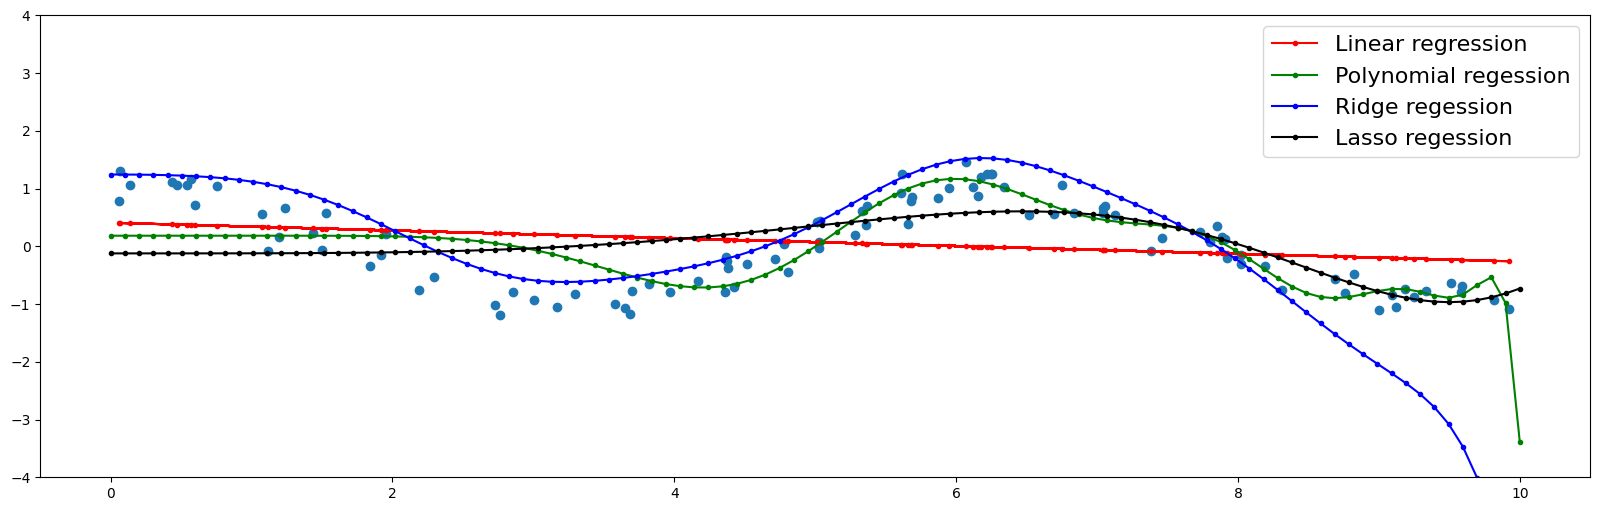

In [12]:
plt.figure(figsize=(20, 6)); plt.rc('legend', fontsize=16)
plt.scatter(X, y)
plt.plot(X, y_predict, 'r.-', label='Linear regression'); plt.legend()
plt.plot(Xfit, yfit, 'g.-', label='Polynomial regession'); plt.legend()
plt.plot(Xfit, predict_ridge, 'b.-', label='Ridge regession'); plt.legend()
plt.plot(Xfit, predict_lasso, 'k.-', label='Lasso regession'); plt.legend()
plt.ylim(-4, 4)

## Basis Function Regression

- 입력변수와 종속변수의 선형회귀식(linear regression)을 비선형회귀식(nonlinear relationships)으로 변형하기 위해 기저함수(*basis functions*)를 적용한다.
$$
y = a_0 + a_1 x_1 + a_2 x_2 + a_3 x_3 + \cdots
$$

$x_n = f_n(x)$, where $f_n()$ is 입력데이터(행렬)을 변환하는 함수

예를 들어 if $f_n(x) = x^n$, 모델은 다항회귀식(polynomial regression):

$$
y = a_0 + a_1 x + a_2 x^2 + a_3 x^3 + \cdots
$$

### Regularization for Sparsity: L₁ Regularization
- https://developers.google.com/machine-learning/crash-course/regularization-for-sparsity/l1-regularization

### Regularization for Simplicity: Playground Exercise (L2 Regularization) 
- https://developers.google.com/machine-learning/crash-course/regularization-for-simplicity/playground-exercise-examining-l2-regularization

## 분류모형 : 로지스틱 회귀분석(Logistic Regression)

In [13]:
from sklearn.datasets import load_iris
data = load_iris()
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

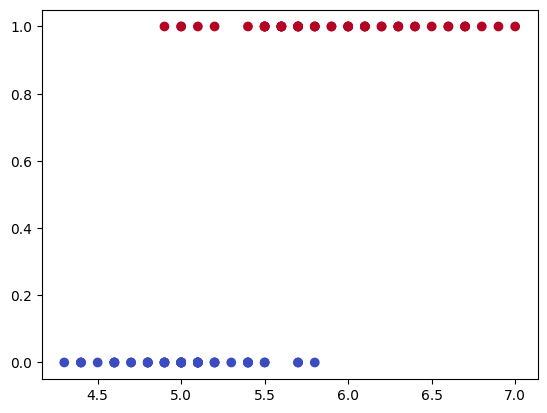

In [14]:
X = data['data'][:100, :1]
y = data['target'][:100]
plt.scatter(X, y, c=y, cmap='coolwarm')

In [15]:
X.flatten()

array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.6, 5. , 4.4, 4.9, 5.4, 4.8, 4.8,
       4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5. ,
       5. , 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5. , 5.5, 4.9, 4.4,
       5.1, 5. , 4.5, 4.4, 5. , 5.1, 4.8, 5.1, 4.6, 5.3, 5. , 7. , 6.4,
       6.9, 5.5, 6.5, 5.7, 6.3, 4.9, 6.6, 5.2, 5. , 5.9, 6. , 6.1, 5.6,
       6.7, 5.6, 5.8, 6.2, 5.6, 5.9, 6.1, 6.3, 6.1, 6.4, 6.6, 6.8, 6.7,
       6. , 5.7, 5.5, 5.5, 5.8, 6. , 5.4, 6. , 6.7, 6.3, 5.6, 5.5, 5.5,
       6.1, 5.8, 5. , 5.6, 5.7, 5.7, 6.2, 5.1, 5.7])

In [16]:
sig = 1/(1 + np.exp(-X.flatten()))
type(sig)

numpy.ndarray

(-1.1, 1.1)

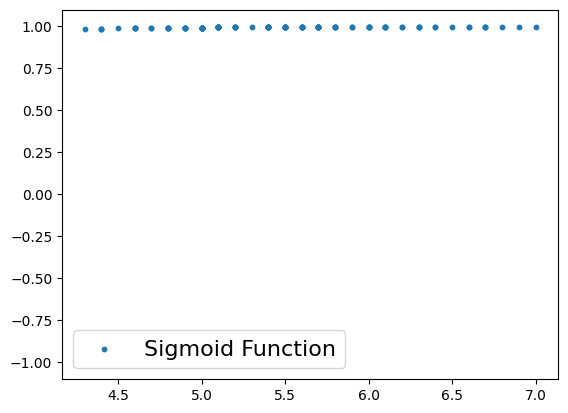

In [17]:
plt.scatter(X.flatten(), 1/(1 + np.exp(-X.flatten())), s=10, label='Sigmoid Function')
plt.ylim([-1.1, 1.1])
plt.legend(loc=2)
plt.legend()

$$\text{Sigmoid}(z) = \text{Logitstic}(z) = \dfrac{1}{1+\exp{(-z)}}$$


$$
z = a_0 + a_1 x_1 + a_2 x_2 + \cdots
$$

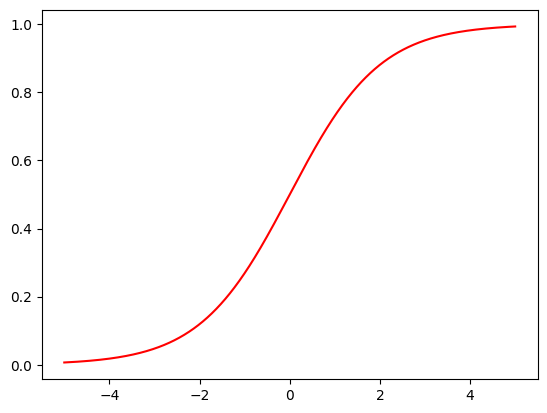

In [18]:
xx = np.linspace(-5, 5, 1000)
plt.plot(xx, 1/(1+np.exp(-xx)), 'r-', label='Sigmoid Function')

### 시그모이드 함수(Sigmoid function)
시그모이드 함수의 출력값이 0 또는 1에 가까워지면, 그래프의 기울기가 완만해져 그 값은 0에 가까워지는데 역전파 과정에서 0에 가까운 아주 작은 기울기가 곱해지게 되면, 앞단에는 기울기가 잘 전달되지 않게 되는 현상을 기울기 소실(Vanishing Gradient) 문제

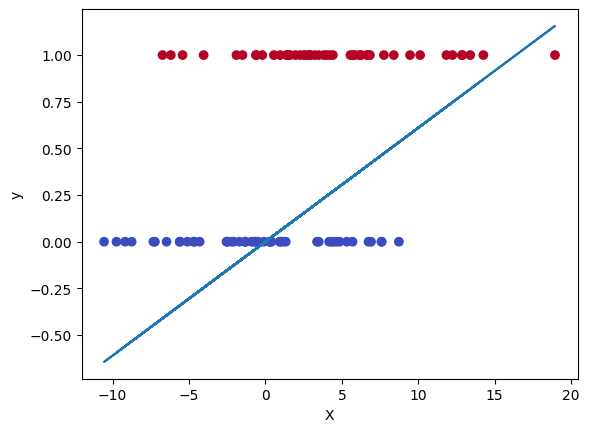

Optimization terminated successfully.
         Current function value: 0.601782
         Iterations 5


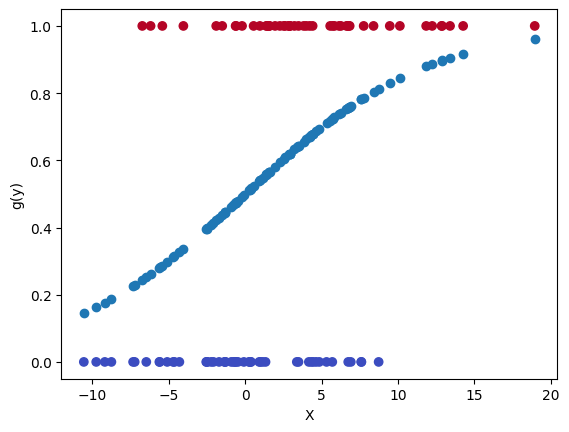

In [19]:
from sklearn.datasets import make_blobs
import statsmodels.api as sm
X, y = make_blobs(100, 1, centers=2, random_state=14, cluster_std=5)
y_predict = sm.OLS(y, X).fit().predict(X)
plt.scatter(X[:, 0], y, c=y, cmap='coolwarm')
plt.plot(X, y_predict); plt.ylabel('y'); plt.xlabel('X'); plt.show()

y_predict = sm.Logit(y, X).fit().predict(X) 
plt.scatter(X[:, 0], y, c=y, cmap='coolwarm')
plt.scatter(X, y_predict); plt.ylabel('g(y)'); plt.xlabel('X'); 

# Iris 데이터로 로지스틱회귀분석 이해하기, Sigmoid Function

In [65]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data[:, :2]  # 2차원 그림 그리려고 2개 변수만
y = iris.target
# iris 이름이 setosa and versicolor 인 개만 이항분류를 위해
X = X[(y == 0) | (y == 1)]
y = y[(y == 0) | (y == 1)]

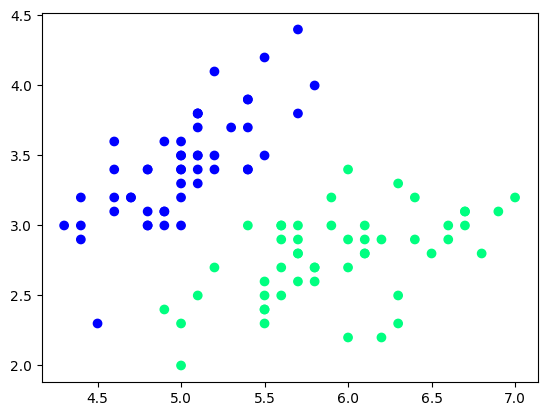

In [66]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter')

In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [68]:
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression(random_state=11, solver='saga')
lr.fit(X_train, y_train)
lr.coef_

LogisticRegression(random_state=11, solver='saga')

array([[ 2.11180081, -3.20424966]])

In [69]:
z = X@lr.coef_.reshape(2,1)
lgr = 1 / (1 + np.exp(-z))

In [70]:
type(lgr)

numpy.ndarray

In [71]:
np.sort(lgr.flatten())

array([0.10376635, 0.11290214, 0.13670347, 0.13931212, 0.19687133,
       0.19687133, 0.19687133, 0.23371087, 0.23502251, 0.25108211,
       0.25108211, 0.25245913, 0.27362761, 0.27654288, 0.31912302,
       0.31912302, 0.34002575, 0.34166802, 0.34166802, 0.36157056,
       0.3683469 , 0.37004926, 0.3888855 , 0.39062408, 0.39062408,
       0.41691641, 0.41691641, 0.41869445, 0.41869445, 0.4204746 ,
       0.44188642, 0.44549489, 0.46533468, 0.46897373, 0.49624511,
       0.49989988, 0.52171517, 0.54888341, 0.55069271, 0.57576331,
       0.59869502, 0.60220234, 0.60220234, 0.62463662, 0.62463662,
       0.62805807, 0.62805807, 0.67591795, 0.72036142, 0.85524632,
       0.85704682, 0.89410067, 0.90078933, 0.90144067, 0.90144067,
       0.91132246, 0.91867774, 0.92647493, 0.93447939, 0.9387923 ,
       0.93962698, 0.940451  , 0.94515696, 0.95544128, 0.95544128,
       0.95986756, 0.96042696, 0.96309931, 0.96335821, 0.96387078,
       0.9670252 , 0.97313402, 0.97332446, 0.97332446, 0.97351

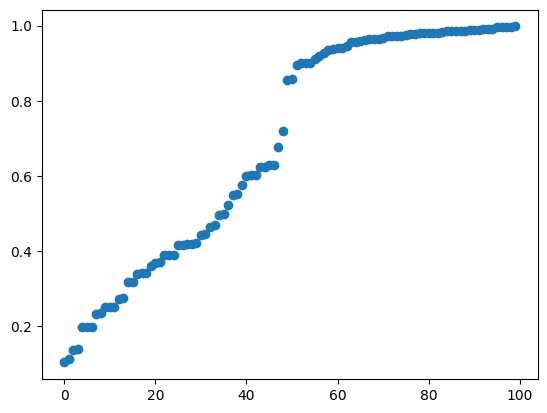

In [72]:
plt.scatter(np.arange(len(lgr)), np.sort(lgr.flatten()), cmap='winter')

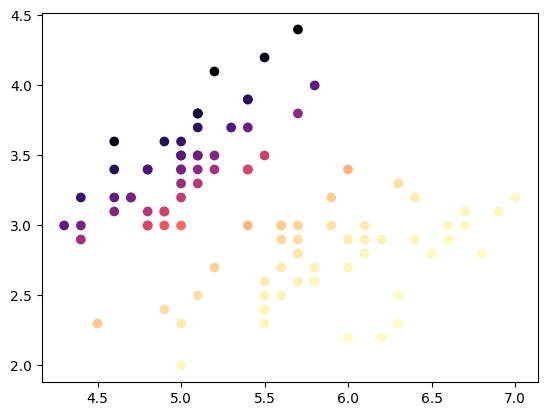

In [73]:
plt.scatter(X[:, 0], X[:, 1], c=lgr, cmap='magma')

In [74]:
# Add a column for the bias
n = X.shape[0] 
X_with_bias = np.hstack((np.ones((n, 1)), X))
X_with_bias[:10]

array([[1. , 5.1, 3.5],
       [1. , 4.9, 3. ],
       [1. , 4.7, 3.2],
       [1. , 4.6, 3.1],
       [1. , 5. , 3.6],
       [1. , 5.4, 3.9],
       [1. , 4.6, 3.4],
       [1. , 5. , 3.4],
       [1. , 4.4, 2.9],
       [1. , 4.9, 3.1]])

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X_with_bias, y, random_state=0)

In [76]:
lr.fit(X_train, y_train)
lr.coef_

LogisticRegression(random_state=11, solver='saga')

array([[-0.3694407 ,  2.14544461, -3.17691909]])

In [77]:
X_with_bias.shape
lr.coef_.reshape(3,1).shape

(100, 3)

(3, 1)

In [78]:
z = X_with_bias@lr.coef_.reshape(3,1)
1 / (1 + np.exp(-z))

array([[0.36658626],
       [0.64850646],
       [0.38888723],
       [0.41366262],
       [0.25367138],
       [0.23612836],
       [0.213842  ],
       [0.39084956],
       [0.46442279],
       [0.57316809],
       [0.36850391],
       [0.29466548],
       [0.5981917 ],
       [0.33742598],
       [0.34670867],
       [0.10727812],
       [0.23612836],
       [0.36658626],
       [0.44702483],
       [0.18243064],
       [0.6021509 ],
       [0.23464361],
       [0.12594432],
       [0.52210903],
       [0.29466548],
       [0.69572554],
       [0.39084956],
       [0.41767003],
       [0.49633666],
       [0.38888723],
       [0.52005031],
       [0.6021509 ],
       [0.09634632],
       [0.12869403],
       [0.57316809],
       [0.54776423],
       [0.57719958],
       [0.21523214],
       [0.3869285 ],
       [0.44295001],
       [0.31833491],
       [0.8784834 ],
       [0.25056044],
       [0.31833491],
       [0.18243064],
       [0.5981917 ],
       [0.18243064],
       [0.339

<Figure size 800x600 with 0 Axes>

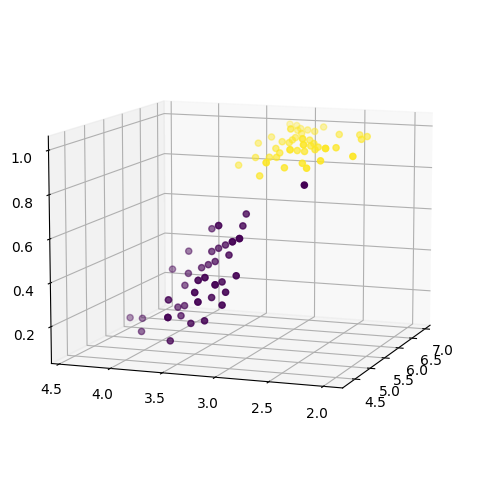

In [79]:
from mpl_toolkits import mplot3d
plt.figure(figsize=(8,6))
ax = plt.axes(projection='3d')
ax.scatter3D(X[:, 0], X[:,1],1 / (1 + np.exp(-z)), c=y)
ax.view_init(10, 200)

## Titanic 예제

In [37]:
import seaborn as sns
df = sns.load_dataset('titanic')

In [38]:
y = df['survived']

In [39]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [40]:
X  = df.drop(columns= ['pclass', 'who', 'adult_male', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'])

In [41]:
X.info()
for col in X.columns[[1, 6]]:
    X[col] = X[col].astype('category')
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   survived  891 non-null    int64   
 1   sex       891 non-null    object  
 2   age       714 non-null    float64 
 3   sibsp     891 non-null    int64   
 4   parch     891 non-null    int64   
 5   fare      891 non-null    float64 
 6   embarked  889 non-null    object  
 7   class     891 non-null    category
dtypes: category(1), float64(2), int64(3), object(2)
memory usage: 49.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   survived  891 non-null    int64   
 1   sex       891 non-null    category
 2   age       714 non-null    float64 
 3   sibsp     891 non-null    int64   
 4   parch     891 non-null    int64   
 5   fare      891 non-null    float

In [42]:
X.isnull().sum()

survived      0
sex           0
age         177
sibsp         0
parch         0
fare          0
embarked      2
class         0
dtype: int64

In [43]:
X['age'] = X['age'].fillna(X['age'].mean())
X['embarked'] = X['embarked'].fillna(X['embarked'].mode()[0])  # X['embarked'].mode()[0]는 str

In [44]:
X.head()

,survived,sex,age,sibsp,parch,fare,embarked,class
0,0,male,22.0,1,0,7.2500,S,Third
1,1,female,38.0,1,0,71.2833,C,First
2,1,female,26.0,0,0,7.9250,S,Third
3,1,female,35.0,1,0,53.1000,S,First
4,0,male,35.0,0,0,8.0500,S,Third


In [45]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   survived  891 non-null    int64   
 1   sex       891 non-null    category
 2   age       891 non-null    float64 
 3   sibsp     891 non-null    int64   
 4   parch     891 non-null    int64   
 5   fare      891 non-null    float64 
 6   embarked  891 non-null    category
 7   class     891 non-null    category
dtypes: category(3), float64(2), int64(3)
memory usage: 37.9 KB


In [46]:
cats = [col for col in X if X[col].dtypes =='category']

In [47]:
X = pd.get_dummies(X, prefix = cats)
X.head()

,survived,age,sibsp,parch,fare,sex_female,sex_male,embarked_C,embarked_Q,embarked_S,class_First,class_Second,class_Third
0,0,22.0,1,0,7.2500,0,1,0,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0,1,0,0
2,1,26.0,0,0,7.9250,1,0,0,0,1,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1,1,0,0
4,0,35.0,0,0,8.0500,0,1,0,0,1,0,0,1


In [48]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X[['age', 'fare']])
scaler.transform(X[['age', 'fare']])

StandardScaler()

array([[-0.5924806 , -0.50244517],
       [ 0.63878901,  0.78684529],
       [-0.2846632 , -0.48885426],
       ...,
       [ 0.        , -0.17626324],
       [-0.2846632 , -0.04438104],
       [ 0.17706291, -0.49237783]])

In [49]:
scaler.transform(X[['age', 'fare']]).mean(0)
scaler.transform(X[['age', 'fare']]).std(0)

array([2.23290646e-16, 3.98733297e-18])

array([1., 1.])

In [50]:
X.loc[:, ['age', 'fare']] = scaler.transform(X[['age', 'fare']])
X.head()

,survived,age,sibsp,parch,fare,sex_female,sex_male,embarked_C,embarked_Q,embarked_S,class_First,class_Second,class_Third
0,0,-0.592481,1,0,-0.502445,0,1,0,0,1,0,0,1
1,1,0.638789,1,0,0.786845,1,0,1,0,0,1,0,0
2,1,-0.284663,0,0,-0.488854,1,0,0,0,1,0,0,1
3,1,0.407926,1,0,0.420730,1,0,0,0,1,1,0,0
4,0,0.407926,0,0,-0.486337,0,1,0,0,1,0,0,1


In [51]:
X.describe()

,survived,age,sibsp,parch,fare,sex_female,sex_male,embarked_C,embarked_Q,embarked_S,class_First,class_Second,class_Third
count,891.000000,8.910000e+02,891.000000,891.000000,8.910000e+02,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.232906e-16,0.523008,0.381594,3.987333e-18,0.352413,0.647587,0.188552,0.086420,0.725028,0.242424,0.206510,0.551066
std,0.486592,1.000562e+00,1.102743,0.806057,1.000562e+00,0.477990,0.477990,0.391372,0.281141,0.446751,0.428790,0.405028,0.497665
min,0.000000,-2.253155e+00,0.000000,0.000000,-6.484217e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,-5.924806e-01,0.000000,0.000000,-4.891482e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000e+00,0.000000,0.000000,-3.573909e-01,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,1.000000,4.079260e-01,1.000000,0.000000,-2.424635e-02,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,3.870872e+00,8.000000,6.000000,9.667167e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [52]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, 
                                                  stratify= y, random_state=11)
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression(random_state=11, solver='saga')

lr.fit(X_train, y_train)

LogisticRegression(random_state=11, solver='saga')

In [53]:
y_predict = lr.predict(X_test)

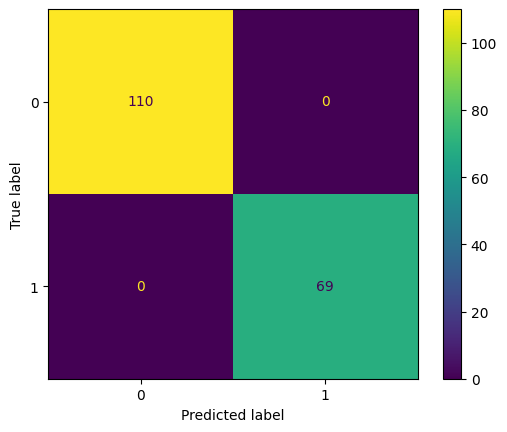

In [54]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_predict, labels=lr.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=lr.classes_)
disp.plot()

In [55]:
from sklearn.datasets import load_digits
data = load_digits()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['label'] = data.target   #df['label'] = df['label'].apply(lambda x: 0 if x != 1 else x)
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,label
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [56]:
X = df.drop('label', axis=1)
X = X/X.max() # 표준화
X.fillna(0, inplace=True)
y = df['label']

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, 
                                                  stratify= y, random_state=11)
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
base_lr= LogisticRegression(random_state=11, solver='saga')
# OneVsRestClassifier wrapper.
ovr = OneVsRestClassifier(base_lr)
ovr.fit(X_train, y_train)

OneVsRestClassifier(estimator=LogisticRegression(random_state=11,
                                                 solver='saga'))

In [58]:
y_predict = ovr.predict(X_test)

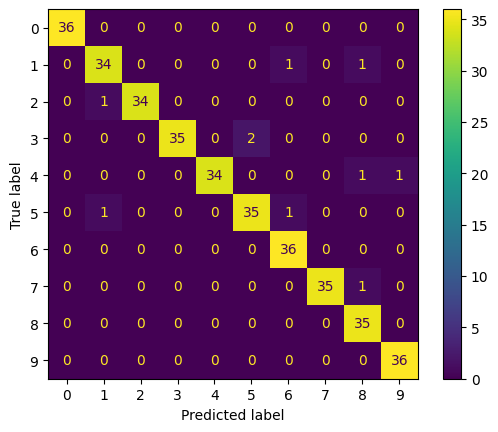

In [59]:
%matplotlib inline
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_predict, labels=ovr.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=ovr.classes_)
disp.plot()

##  <font color ='blue'> 실습 예제: Digits Classification Exercise with 3번의 교차검증과 Hyperparameter

In [60]:
from sklearn.datasets import load_digits
data = load_digits()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['label'] = data.target
df['label'] = df['label'].apply(lambda x: 0 if x != 1 else x)
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,label
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,0


0

0    0.89872
1    0.10128
Name: label, dtype: float64

<Axes: >

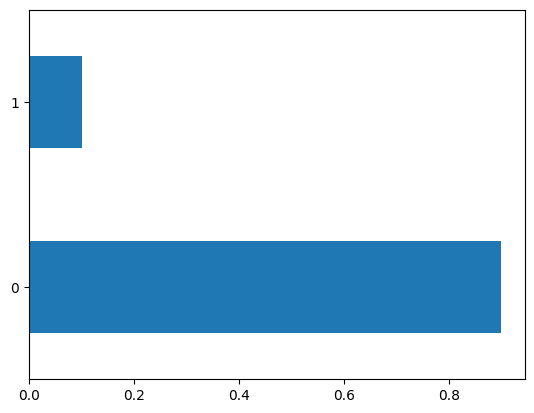

In [61]:
X = df.drop('label', axis=1)
X = X/X.max() # 표준화
X.fillna(0, inplace=True)
df.isnull().sum().sum()
y = df['label']
y.value_counts(normalize=True)
y.value_counts(normalize=True).plot.barh()

In [62]:
# 모델 선택
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, 
                                                  stratify= y, random_state=11)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, RandomizedSearchCV
np.random.seed(1357)
kf = KFold(n_splits=3)
model = LogisticRegression(solver='saga', random_state=11)
params = {'C': np.logspace(-4, 4, 20), 'penalty': ['l1', 'l2']}
grid = RandomizedSearchCV(model, param_distributions=params, cv=kf,
                          scoring = 'recall')
grid.fit(X_train, y_train)
print('optimal train score: {:.3f}'.format(grid.best_score_))
print('test score: {:.3f}'.format(grid.score(X_test, y_test)))
print('optimal parameter: {}'.format(grid.best_params_))

RandomizedSearchCV(cv=KFold(n_splits=3, random_state=None, shuffle=False),
                   estimator=LogisticRegression(random_state=11, solver='saga'),
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'penalty': ['l1', 'l2']},
                   scoring='recall')

optimal train score: 0.925
test score: 0.972
optimal parameter: {'penalty': 'l2', 'C': 78.47599703514607}


In [63]:
model= LogisticRegression(random_state=11, solver='saga').set_params(**grid.best_params_)
model.get_params()
model.fit(X_train, y_train)
model.intercept_

{'C': 78.47599703514607,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 11,
 'solver': 'saga',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

LogisticRegression(C=78.47599703514607, random_state=11, solver='saga')

array([-10.89740031])

# End

## 왜곡데이터 교정(정규화)

In [ ]:
# Generate a skewed and kurtotic dataset
data = np.random.gamma(1.5, size=10000)

# Plot the original data
plt.figure(figsize=(8,6))
plt.hist(data, bins=50, density=True, alpha=0.7)
plt.title("Original Data")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

# Transform the data using the logarithmic function
log_data = np.log(data)

# Plot the transformed data
plt.figure(figsize=(8,6))
plt.hist(log_data, bins=50, density=True, alpha=0.7)
plt.title("Log-Transformed Data")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

In [ ]:
np.log(1000000)

In [ ]:
np.log(100)

In [ ]:
np.log(1/1000000)

In [ ]:
np.log(1/100)